## 深度学习演示2：实现一个最简单的Deep Dream

Deep Dream是一个非常有趣的算法，利用已经训练好的卷积网络模型，对输入图像进行反向修改，放大卷积网络中某部分的输出。

这里演示一个最简单的反向图像生成。和之前的演示一样，我们同样适用VGG的ImageNet模型。

* Google的论文和伪代码

https://github.com/google/deepdream 

* 基于Python和Caffe的实现

https://github.com/jrosebr1/bat-country

https://github.com/jcjohnson/cnn-vis

＊ 基于Torch的实现

https://github.com/eladhoffer/DeepDream.torch 

https://github.com/Teaonly/easyDreaming (鄙人的简单实现）


### 1. 裁减模型，去掉顶部的全连接层


In [1]:
require('nn')

cnnModel = nn.Sequential()
local fullModel = torch.load('./net.bin') --装载原始模型
for i = 1, 28 do
    cnnModel:add( fullModel.modules[i] )
end
cnnModel:double()
cnnModel:evaluate()

meta = torch.load('./meta.bin')
meta.channelMean = {};
for i = 1, 3 do
    meta.channelMean[i] = torch.mean( meta.mean[{i, {}, {} }] )
end

collectgarbage()

### 2. 准备图像以及预处理

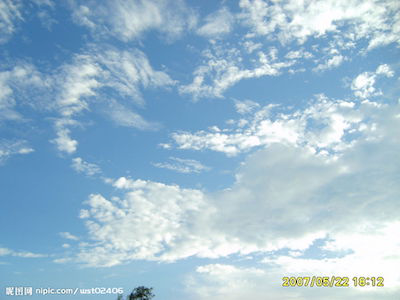

In [5]:
require('image')

local orignalImg = image.loadPNG('./input.png', 3)
itorch.image(orignalImg)

targetImg = orignalImg * 256
for j = 1, 3 do
  targetImg[{j, {}, {}}] = targetImg[{j, {}, {}}] - meta.channelMean[j] 
end


### 3. 实施Deep Dream